# Bigrams

We want to learn something from a dataset of words.
First of all, we need a machine which generates these data (the so-called words).

In [120]:
words = open('data/nomi_italiani.txt').read().splitlines()

Let's figure out the length of each word in our dataset.

In [121]:
L = [len(w) for w in words]
print(words[L.index(max(L))])

marie-odette-rose-gabrielle


In [122]:
print(L)

[5, 10, 11, 11, 10, 8, 9, 8, 9, 8, 8, 5, 6, 5, 8, 8, 5, 7, 7, 8, 6, 7, 6, 8, 8, 6, 7, 7, 8, 8, 7, 10, 7, 7, 8, 8, 9, 10, 6, 6, 8, 7, 3, 9, 9, 8, 9, 8, 9, 8, 6, 8, 8, 6, 7, 5, 8, 8, 7, 7, 5, 7, 9, 7, 7, 10, 10, 9, 4, 5, 8, 8, 8, 8, 8, 6, 7, 8, 8, 6, 5, 8, 8, 6, 8, 8, 7, 6, 6, 7, 8, 8, 7, 6, 7, 8, 8, 7, 6, 8, 8, 8, 8, 8, 6, 5, 5, 7, 7, 6, 7, 6, 5, 4, 4, 8, 8, 7, 7, 6, 4, 5, 7, 7, 6, 6, 7, 7, 5, 5, 8, 8, 4, 9, 6, 8, 6, 3, 6, 8, 8, 6, 13, 5, 5, 8, 8, 8, 8, 7, 7, 6, 8, 6, 7, 7, 7, 5, 19, 7, 7, 7, 5, 4, 6, 7, 6, 4, 11, 11, 4, 6, 8, 8, 6, 4, 9, 8, 6, 7, 10, 5, 6, 7, 5, 8, 7, 7, 5, 8, 9, 7, 6, 6, 4, 7, 4, 8, 5, 5, 8, 6, 7, 7, 6, 8, 7, 13, 15, 8, 8, 8, 8, 9, 9, 7, 9, 5, 5, 4, 7, 4, 4, 4, 4, 6, 7, 5, 5, 3, 7, 7, 9, 9, 4, 8, 7, 4, 7, 4, 6, 7, 8, 6, 8, 8, 8, 8, 8, 8, 7, 9, 9, 7, 6, 6, 5, 8, 7, 7, 4, 7, 7, 5, 5, 7, 7, 9, 7, 9, 6, 6, 7, 6, 6, 6, 6, 6, 7, 4, 9, 10, 9, 9, 9, 9, 8, 8, 7, 8, 7, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 7, 6, 8, 8, 8, 7, 10, 8, 8, 6, 6, 7, 9, 4, 10, 12, 10, 7, 8, 8, 8, 8, 8, 7, 7

In [123]:
import random
random.seed(154)
random.shuffle(words)
print(words[:10])

['castorino', 'ella', 'irmo', 'leoluca', 'sankhare', 'galvano', 'faleria', 'germando', 'illo', 'romilde']


In [124]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

c a
a s
s t
t o
o r
r i
i n
n o


In [125]:
print(w)
list(w)
print(w[1:])

castorino
astorino


To get all bigrams of, for example, the last three words one can do something like that

In [126]:
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> c
c a
a s
s t
t o
o r
r i
i n
n o
o <E>
<S> e
e l
l l
l a
a <E>
<S> i
i r
r m
m o
o <E>


How many often does a bigram happen?

In [127]:
b = {}
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        b[(ch1, ch2)] = b.get((ch1, ch2), 0) + 1
print(b)

{('<S>', 'c'): 1, ('c', 'a'): 1, ('a', 's'): 1, ('s', 't'): 1, ('t', 'o'): 1, ('o', 'r'): 1, ('r', 'i'): 1, ('i', 'n'): 1, ('n', 'o'): 1, ('o', '<E>'): 2, ('<S>', 'e'): 1, ('e', 'l'): 1, ('l', 'l'): 1, ('l', 'a'): 1, ('a', '<E>'): 1, ('<S>', 'i'): 1, ('i', 'r'): 1, ('r', 'm'): 1, ('m', 'o'): 1}


We can do it for all words

In [128]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        b[(ch1, ch2)] = b.get((ch1, ch2), 0) + 1
print(b)

{('<S>', 'c'): 520, ('c', 'a'): 333, ('a', 's'): 236, ('s', 't'): 307, ('t', 'o'): 559, ('o', 'r'): 920, ('r', 'i'): 1483, ('i', 'n'): 1935, ('n', 'o'): 1269, ('o', '<E>'): 4235, ('<S>', 'e'): 629, ('e', 'l'): 1070, ('l', 'l'): 537, ('l', 'a'): 682, ('a', '<E>'): 3831, ('<S>', 'i'): 319, ('i', 'r'): 268, ('r', 'm'): 182, ('m', 'o'): 263, ('<S>', 'l'): 446, ('l', 'e'): 511, ('e', 'o'): 219, ('o', 'l'): 545, ('l', 'u'): 110, ('u', 'c'): 154, ('<S>', 's'): 391, ('s', 'a'): 333, ('a', 'n'): 1497, ('n', 'k'): 2, ('k', 'h'): 4, ('h', 'a'): 25, ('a', 'r'): 957, ('r', 'e'): 584, ('e', '<E>'): 630, ('<S>', 'g'): 657, ('g', 'a'): 156, ('a', 'l'): 856, ('l', 'v'): 140, ('v', 'a'): 279, ('<S>', 'f'): 885, ('f', 'a'): 187, ('e', 'r'): 1149, ('i', 'a'): 1344, ('g', 'e'): 272, ('m', 'a'): 663, ('n', 'd'): 433, ('d', 'o'): 754, ('i', 'l'): 712, ('l', 'o'): 474, ('<S>', 'r'): 626, ('r', 'o'): 705, ('o', 'm'): 177, ('m', 'i'): 532, ('l', 'd'): 405, ('d', 'e'): 540, ('m', 'e'): 335, ('<S>', 'a'): 1095, (

We now want to construct a machine which tells us the probability of the next character.
Let's sort all by frequency

In [129]:
print(sorted(b.items(), key=lambda z: -z[1]))

[(('o', '<E>'), 4235), (('a', '<E>'), 3831), (('i', 'n'), 1935), (('a', 'n'), 1497), (('r', 'i'), 1483), (('n', 'a'), 1429), (('i', 'o'), 1380), (('i', 'a'), 1344), (('n', 'o'), 1269), (('l', 'i'), 1261), (('e', 'r'), 1149), (('<S>', 'a'), 1095), (('e', 'l'), 1070), (('a', 'r'), 957), (('o', 'r'), 920), (('<S>', 'f'), 885), (('a', 'l'), 856), (('<S>', 'o'), 789), (('d', 'o'), 754), (('i', 'l'), 712), (('r', 'o'), 705), (('e', 'n'), 699), (('r', 'a'), 686), (('l', 'a'), 682), (('m', 'a'), 663), (('<S>', 'g'), 657), (('n', 'i'), 649), (('e', '<E>'), 630), (('<S>', 'e'), 629), (('<S>', 'r'), 626), (('<S>', 'm'), 595), (('o', 'n'), 591), (('r', 'e'), 584), (('t', 'a'), 580), (('d', 'a'), 565), (('t', 'o'), 559), (('d', 'i'), 552), (('o', 'l'), 545), (('d', 'e'), 540), (('l', 'l'), 537), (('m', 'i'), 532), (('s', 'i'), 531), (('<S>', 'c'), 520), (('l', 'e'), 511), (('g', 'i'), 496), (('i', 's'), 482), (('l', 'o'), 474), (('<S>', 'l'), 446), (('n', 'e'), 437), (('n', 'd'), 433), (('t', 'i'),

With the set function built-in python one can get the unique elements of a list

In [130]:
w = set(list(words[1]))
print(w)

{'l', 'a', 'e'}


Now we want to code this information
Let's take only the unique elements of a word, then of all words, i.e. our finite alphabet

In [131]:
chars = sorted(list(set(''.join(words))))
print(chars)

['-', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


At this point we should have 27 characters, 26 letters of the alphabet and the dash from composite names

In [132]:
print(len(chars))

27


Actually we need 29 characters, i.e. the 27 previously discussed plus the initial and final of a word

In [133]:
import torch

N = torch.zeros(29, 29)

Let's now build an encoder, which assigns an integer value to each character of our alphabet.
This will be a dictionary. 

In [134]:
stoi = {s:i for i, s in enumerate(chars)}
stoi['<S>'] = 27
stoi['<E>'] = 28
print(stoi)

{'-': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '<S>': 27, '<E>': 28}


Now let's count the frequency of each bigram and put it in our tensor.

In [135]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1
N[28,27] = 1 # <E> <S>

<Axes: >

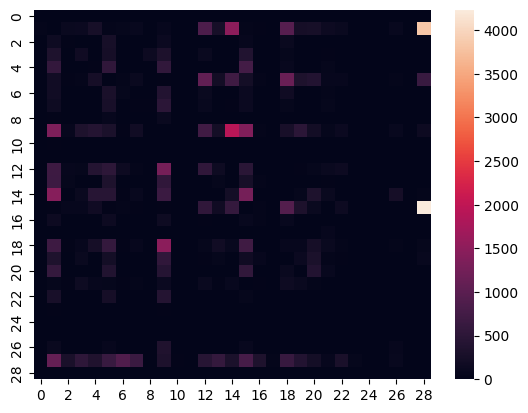

In [136]:
import seaborn as sns
sns.heatmap(N)

Now one can also build a decoder

In [137]:
itos = {i:s for s, i in stoi.items()}
print(itos)

{0: '-', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 27: '<S>', 28: '<E>'}


For a better visualization we can plot the whole matrix together with the bigrams and their frequencies

<Axes: >

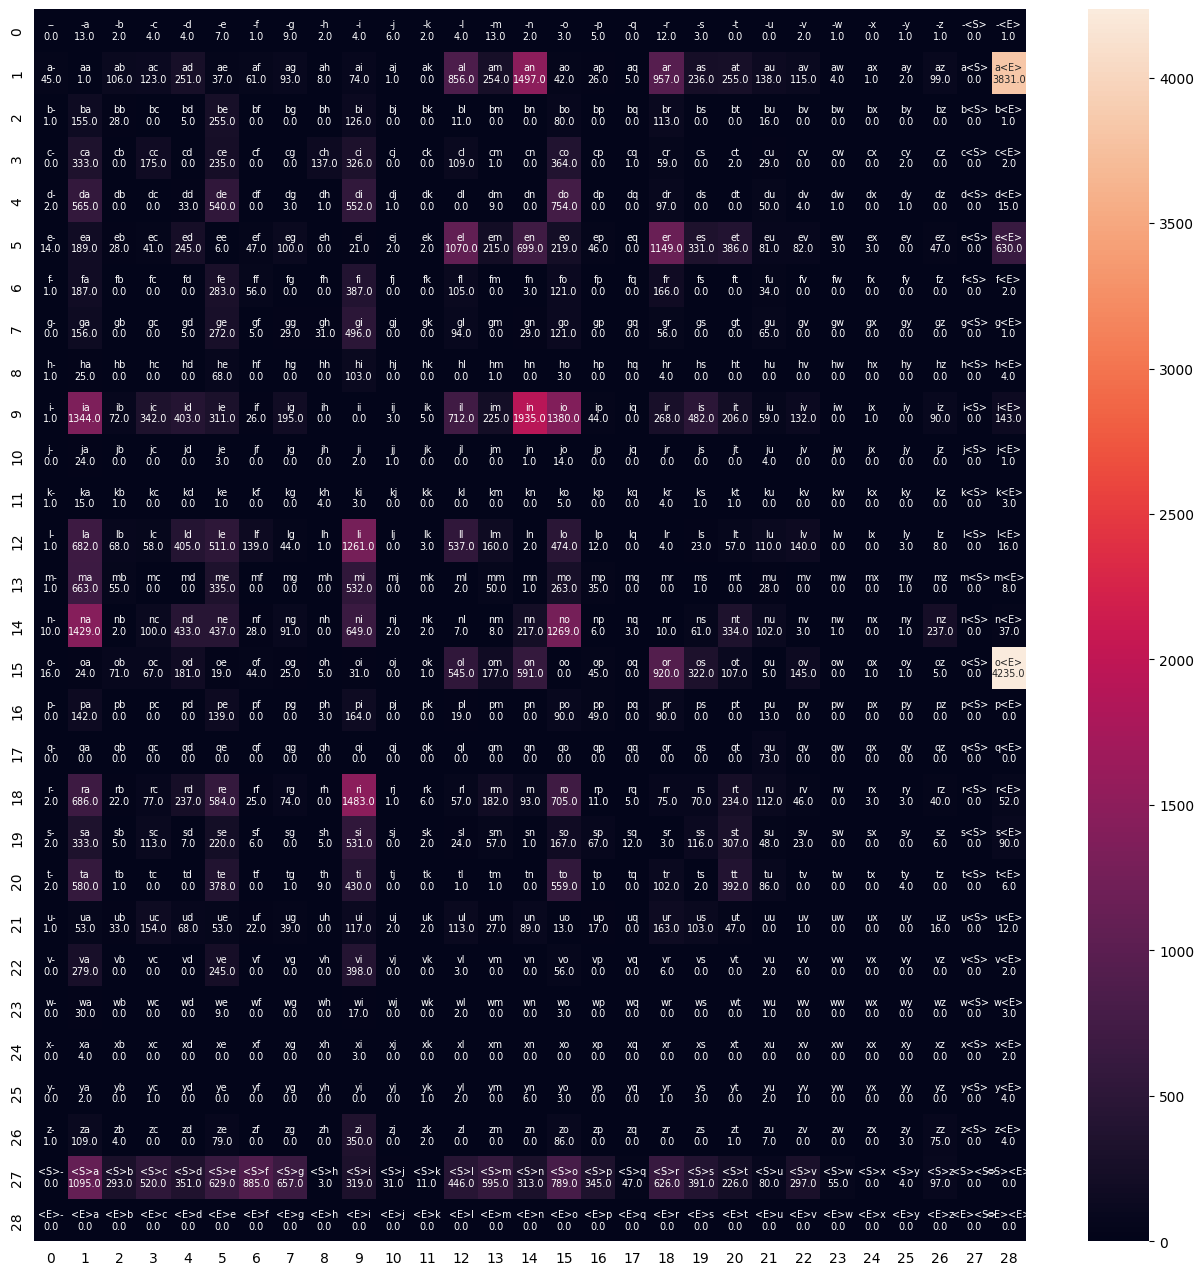

In [138]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(16, 16))
ax.tick_params(left=False, bottom=False)
labels = np.array([[itos[i] + itos[j] + '\n' + str(N[i,j].item()) for j in range(29)] for i in range(29)])
sns.heatmap(N, fmt='', annot=labels, annot_kws={"fontsize":6.9}) # nice font size

How can we use counting to infer our probability?
How can we reproduce the probability distribution of these numbers?

Let's start by computing the probability of the first character.
First, normalize all the rows of the tensor.

In [139]:
# p = N / N.sum(axis=1, keepdims=True)

In [158]:
# g=torch.Generator().manual_seed(123450)

for i in range(10):
    out=[]
    ix=27
    while True:
        p = N[ix].float()
        p = p / p.sum()
        # try to sample from uniform and compare
        # p=torch.ones(29)/29.0
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==28:
            break
    print(''.join(out))

aliondescosalucinta<E>
ca<E>
ezinsvelvllantetisparentona<E>
fio<E>
gedonadriordalilo<E>
rinono<E>
zzolino<E>
spunellldafenanasaccorana<E>
fa<E>
a<E>


FROM NOW ON ONLY NOTES, CODE WILL BE ADDED NEXT

Let's simplify this process, using the dot char instead of <\S> and <\E>
The 0th row, assuming '.' is the 0 character, represents the frequency of starting letters.
It's not difficult to turn it into probability: just normalize the counting for each row.
Once we got the prob dist we can sample.
We can also normalize random generated numbers in the same way (with the sum).
We generate a probability vector and normalize it, then we want to use it as prob dist to generate.
We can so extract samples, with repetition obv, from our p vector.
Let's assume p is now our 0th row normalized, i.e. '.' + '%c' string (a dot followed by any character).
Notice that an integer is generated, not actually a word.
Using the conditional probability known by the dataset one can start to generate words basing on bigrams, actually in a Markov chain approximation.
However, the result is not properly good (is very very bad ngl).
Words generated with uniform dist are way worse, so just using the probability of the dataset (simple information - just counting) one can achieve a quite good result wrt the total randomness.
CHATGPT has a vocabulary of words (chunks - word pieces), not characters.
The object used to *learn* is entropy, but it's a next-lesson problem by now.
The architecture of this learning system can be used in every setup (also particle physics).
Is is possible with pytorch to normalize all the rows of a matrix (stochastic on the row) by doing M/M.sum(...).
We'll need to do this a lot.

How to evaluate an algorithm like this one? (just one char memory)
How can we do better?